In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import sys

# Configuration
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5  # black_sigatoka, potassium_deficiency, yellow_sigatoka, panama_disease, healthy

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

#datasets
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MainDataset/Train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MainDataset/Validation',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/MainDataset/Test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('banana_leaf_disease_classifier.h5')

# Function to predict single image
def predict_disease(image_path):
    try:
        # Load and preprocess image
        img = image.load_img(image_path, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Get class labels
        class_labels = list(train_generator.class_indices.keys())

        # Predict
        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]
        confidence = np.max(prediction)

        return predicted_class, confidence

    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None

Found 2004 images belonging to 5 classes.
Found 113 images belonging to 5 classes.
Found 539 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 836s 13s/step - accuracy: 0.6596 - loss: 1.0676 - val_accuracy: 0.4425 - val_loss: 1.5817
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7945 - loss: 0.5758 - val_accuracy: 0.4513 - val_loss: 1.5188
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8550 - loss: 0.3465 - val_accuracy: 0.3097 - val_loss: 2.0800
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8532 - loss: 0.3505 - val_accuracy: 0.4336 - val_loss: 1.4632
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8793 - loss: 0.3215 - val_accuracy: 0.5221 - val_loss: 1.2249
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8721 - loss: 0.3026 - val_accuracy: 0.4248 - val_loss: 1.5197
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8917 - loss: 0.2582 - val_accuracy: 0.2832 - val_loss: 3.1365
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9068 - loss: 0.2206 - val_accuracy: 0.2920 - 

Test accuracy: 0.6048237681388855


In [ ]:
if __name__ == "__main__":
    # If running in a notebook or IDE, this prevents '-f' error
    if len(sys.argv) > 1 and not sys.argv[1].startswith('-'):
        image_path = sys.argv[1]
        if os.path.exists(image_path):
            disease, confidence = predict_disease(image_path)
            if disease:
                print(f"Predicted disease: {disease} (Confidence: {confidence:.2f})")
        else:
            print(f"Error: File '{image_path}' not found.")
    else:
        image_path = input("Enter the path to the image: ")
        if os.path.exists(image_path):
            disease, confidence = predict_disease(image_path)
            if disease:
                print(f"Predicted disease: {disease} (Confidence: {confidence:.2f})")
        else:
            print(f"Error: File '{image_path}' not found.")


Enter the path to the image: /content/drive/MyDrive/MainDataset/Train/potassium_deficiency/A 0001 1 .jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted disease: potassium_deficiency (Confidence: 0.95)


Found 539 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 702ms/step


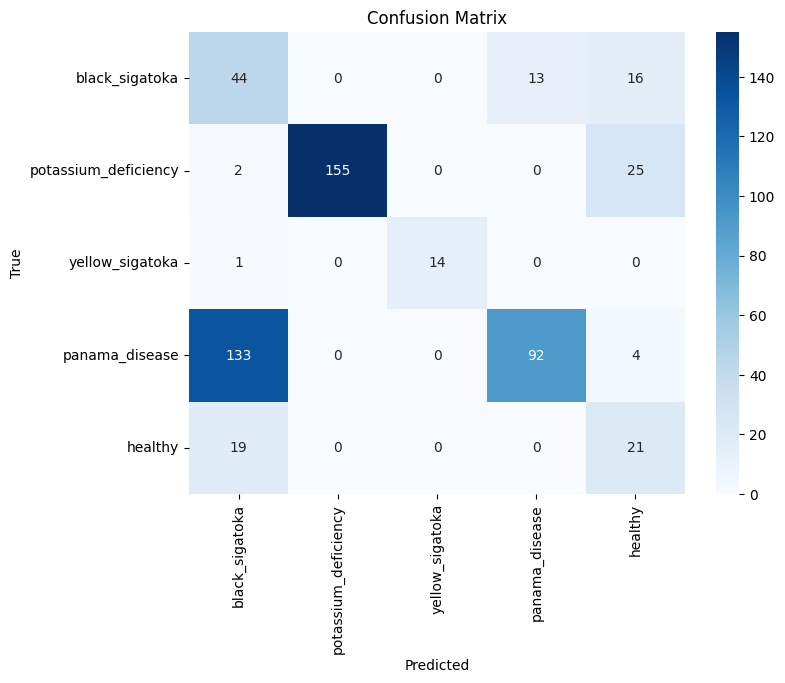

Classification Report:
                       precision    recall  f1-score   support

      black_sigatoka       0.22      0.60      0.32        73
potassium_deficiency       1.00      0.85      0.92       182
     yellow_sigatoka       1.00      0.93      0.97        15
      panama_disease       0.88      0.40      0.55       229
             healthy       0.32      0.53      0.40        40

            accuracy                           0.60       539
           macro avg       0.68      0.66      0.63       539
        weighted avg       0.79      0.60      0.64       539

17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 599ms/step - accuracy: 0.6614 - loss: 1.2758
Test accuracy: 0.6048


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Configuration
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Load the saved model
model = load_model('/content/banana_leaf_disease_classifier.h5')  # adjust if needed

# Define class labels (same order as during training)
class_labels = ['black_sigatoka', 'potassium_deficiency', 'yellow_sigatoka', 'panama_disease', 'healthy']

# Set up test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/MainDataset/Test',  # adjust path if needed
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # VERY IMPORTANT: don't shuffle for accurate evaluation
)

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(test_generator.classes, y_pred, target_names=class_labels)
print('Classification Report:\n', report)

# Test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')


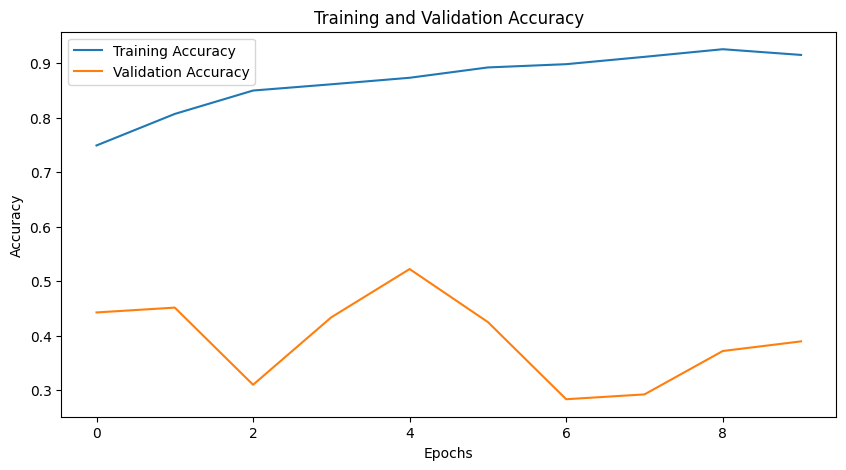

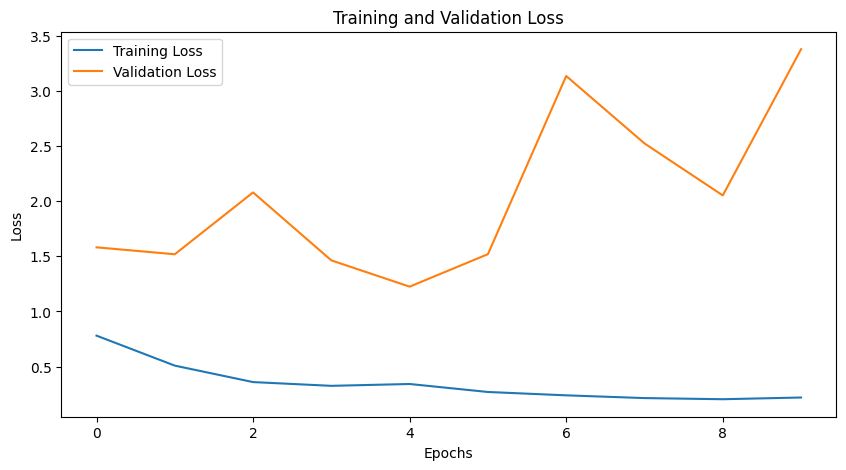

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
